In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

conn = sqlite3.connect("../db/baltasar.db")
def sql(query):
    return pd.read_sql_query(query, conn)

In [7]:
sql('''
select blocknumber, count(*) FROM EntityTaxonomy GROUP BY blocknumber
''')

,blocknumber,count(*)
0,5088001,13340074
1,5260801,13340074
2,5433601,13340074
3,5606401,13340074
4,5779201,13340074
5,5952001,13340074
6,6124801,13340074
7,6297601,13340074
8,6470401,13340074
9,6643201,13340074


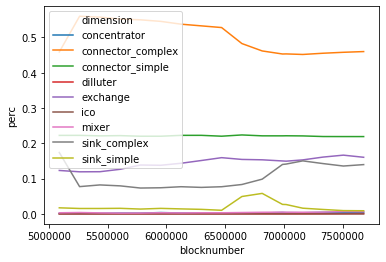

In [25]:
data = sql('''
SELECT 
    blocknumber, type as dimension, sum(percTokens) as perc
FROM TaxonomyResults
WHERE token = '0x'
GROUP BY blocknumber, dimension
''')

sns.lineplot(data=data, x='blocknumber', y='perc', hue='dimension')

In [18]:
data = sql('''
SELECT 
    blocknumber, numberOfTokens as dimension, sum(percTokens) as perc, priceChanges.*
FROM 
    TaxonomyResults r
    NATURAL JOIN
    blockTimestamps t
    NATURAL JOIN
    (SELECT 
        now.date,
        now.token,
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 1 and later.token = now.token) / now.price as "1d_change",
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 7 and later.token = now.token) / now.price as "7d_change",
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 14 and later.token = now.token) / now.price as "14d_change",
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 30 and later.token = now.token) / now.price as "1m_change",
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 60 and later.token = now.token) / now.price as "2m_change",
        (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 90 and later.token = now.token) / now.price as "3m_change"
    FROM
        Price now) priceChanges
WHERE
    dimension = "1"
GROUP BY blocknumber, dimension, token
''')
data

,blocknumber,dimension,perc,date,token,1d_change,7d_change,14d_change,1m_change,3m_change
0,5088001,1,0.254184,1518566400,0x,1.303953,0.878059,0.853732,0.469083,0.739832
1,5088001,1,0.083898,1518566400,aave,0.984528,1.053916,0.958378,0.503248,0.589612
2,5088001,1,0.822764,1518566400,ace,1.008242,0.949540,0.721556,0.364573,0.913275
3,5088001,1,0.708628,1518566400,acute-angle-cloud,1.068493,0.895528,1.054226,0.684670,0.513774
4,5088001,1,0.762755,1518566400,adbank,1.000000,0.781423,0.760786,0.532536,0.469563
5,5088001,1,0.441265,1518566400,adelphoi,1.081475,2.404689,2.404689,2.404689,2.404689
6,5088001,1,0.006220,1518566400,adtoken,0.953967,0.752107,1.031789,0.543023,0.510686
7,5088001,1,0.036568,1518566400,adx-net,1.023831,1.056714,0.926561,0.555466,0.563630
8,5088001,1,0.128105,1518566400,aelf,1.082206,0.987570,0.838967,0.490182,0.763878
9,5088001,1,0.016805,1518566400,aeron,1.107414,1.195996,1.284730,0.794480,0.746144


(0, 3)

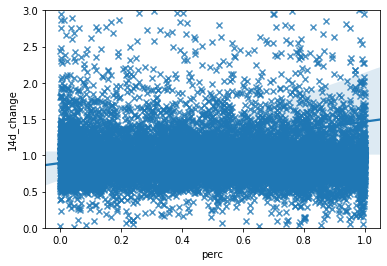

In [58]:
data['goodDev'] = data['3m_change'] > 1.1
data['highPerc'] = data['perc'] > 0.8

data.head()

sns.regplot(data = data, x='perc', y='14d_change', marker = 'x')

plt.gca().set_ylim(0,3)

In [55]:
from scipy.stats import chi2_contingency 
from sklearn.metrics import confusion_matrix


#test_safe = test

obs = confusion_matrix(data['goodDev'], data['highPerc'])
#print(test_safe[['prediction', 'success', 'prediction_proba']])
print(chi2_contingency(obs))
print(obs)


(3.249791473968735e-07, 0.9995451504331886, 1, array([[7816.48897485, 1791.51102515],
       [2698.51102515,  618.48897485]]))
[[7817 1791]
 [2698  619]]


Chi-squared found between: 
- Percentage of tokens held by addresses which only held 1 token > 80% and token increased by more than 1.1% over the time

In [73]:
pivoted = pd.pivot_table(data, values=['perc', 'price'], index=['blocknumber'],
                     columns=['dimension', 'token'], aggfunc=np.sum)

pivoted = pivoted.apply(lambda f: ss.zscore(np.diff(f)), axis = 0)
#unstacked = pivoted.unstack().reset_index(name='val')
#unstacked.rename(columns={'level_0': 'valueType', 'level_3': 'taxonomyID'}, inplace=True)
#unstacked["date"] = data[unstacked["taxonomyID"]]

unstacked
grouped = pd.pivot_table(unstacked, values=['val'], columns=['valueType'], index=['token', 'dimension', 'taxonomyID'])


In [86]:
from statsmodels.tsa import stattools

combined_vector = [unstacked[unstacked['token'] == "0x"][unstacked['dimension'] == "concentrator"][unstacked['valueType'] == "price"].val.values,unstacked[unstacked['token'] == "0x"][unstacked['dimension'] == "concentrator"][unstacked['valueType'] == "perc"].val.values]
maxlag = 3
gc = stattools.grangercausalitytests(combined_vector, maxlag, addconst=True, verbose=False)

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Insufficient observations. Maximum allowable lag is -1

In [57]:
sql('''
SELECT 
    now.date,
    now.token,
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 1 and later.token = now.token) / now.price as "1d_change",
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 7 and later.token = now.token) / now.price as "7d_change",
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 14 and later.token = now.token) / now.price as "14d_change",
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 30 and later.token = now.token) / now.price as "1m_change",
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 60 and later.token = now.token) / now.price as "2m_change",
    (SELECT later.price FROM Price later WHERE later.date = now.date + 86400 * 90 and later.token = now.token) / now.price as "3m_change"
FROM
    Price now
''')

,date,token,1d_change,7d_change,14d_change,1m_change,2m_change,3m_change
0,1566691200,0chain,1.000000,1.000000,NaN,NaN,NaN,NaN
1,1566604800,0chain,0.918129,0.918129,NaN,NaN,NaN,NaN
2,1566518400,0chain,1.171244,1.075353,NaN,NaN,NaN,NaN
3,1566432000,0chain,0.833575,0.896388,NaN,NaN,NaN,NaN
4,1566345600,0chain,1.100843,0.986783,0.986783,NaN,NaN,NaN
5,1566259200,0chain,1.007166,0.993854,0.993854,NaN,NaN,NaN
6,1566172800,0chain,0.988169,0.982095,0.982095,NaN,NaN,NaN
7,1566086400,0chain,1.073032,1.053819,1.053819,NaN,NaN,NaN
8,1566000000,0chain,1.055359,1.211330,1.112157,NaN,NaN,NaN
9,1565913600,0chain,0.981595,1.015190,1.091688,NaN,NaN,NaN
